In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
import xgboost as xgb

In [2]:
# Loading the dataset
df = pd.read_csv('local_file.csv')

In [3]:
# Display the first five rows of the dataset
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# The df.info() function call provides a concise summary of the DataFrame, including the number of entries,
# the number of columns, the column names, the number of non-null entries in each column, and the data type of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# The df.describe() function call generates descriptive statistics for the DataFrame, including count, mean,
# standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum for numerical columns.
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

The dataset shows a significant class imbalance, with 1233 employees not leaving (No) and 237 employees leaving (Yes). This imbalance should be addressed using techniques like stratified sampling, resampling, or adjusting class weights to ensure robust model performance.

In [7]:
# Data preprocessing
# One-hot encode categorical columns and drop the first category to avoid multicollinearity
df = pd.get_dummies(df, columns=['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime'], drop_first=True)

# Set EmployeeNumber as the index
df.set_index('EmployeeNumber', inplace=True)

# Define features and target
X = df.drop(columns=['Attrition_Yes'])
y = df['Attrition_Yes']

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [8]:
# Displaying columns of the dataframe
df.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Attrition_Yes', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Male', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'Jo

## Iteration 1: Basic XGBoost Classifier

In this iteration, a basic XGBoost classifier without any additional techniques was trained to handle class imbalance or hyperparameter optimization. The purpose of this iteration was to establish a baseline performance of the model.

### What is XGBoost?
XGBoost (eXtreme Gradient Boosting) is a powerful machine learning algorithm based on the gradient boosting framework. It is widely used for its speed and performance, providing accurate predictions by combining the outputs of multiple weak models (typically decision trees) to create a strong predictive model.

### What is a Decision Tree?
A decision tree is a simple yet powerful predictive model used in machine learning. It splits the data into subsets based on the value of input features, forming a tree-like structure. Each internal node represents a feature (or attribute), each branch represents a decision rule, and each leaf node represents an outcome (or label). The tree works by asking a series of questions to classify the data.

### Applying XGBoost and Decision Trees to Employee Attrition
In the context of predicting employee attrition:
- **Decision Trees**: Imagine the decision tree as a series of questions about an employee's attributes, such as "Is the employee's job satisfaction low?" or "Does the employee frequently work overtime?". Each question helps to narrow down whether an employee is likely to leave or stay.
- **XGBoost**: XGBoost builds multiple decision trees, each learning from the mistakes of the previous ones, to create a robust model that can predict whether an employee will leave the company (attrition) based on their attributes.

### Steps:
1. One-hot encoded categorical columns to avoid multicollinearity.
2. Set `EmployeeNumber` as the index.
3. Split the data into training and testing sets using a stratified split.
4. Trained an XGBoost classifier with default parameters.
5. Evaluated the model using classification metrics and ROC AUC score.

### Purpose:
- To establish a baseline performance for the model without any advanced techniques.

In [9]:
# Initialize and train XGBoost classifier
model = xgb.XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print(classification_report(y_test, y_pred))
print('ROC AUC:', roc_auc_score(y_test, y_pred_proba))

              precision    recall  f1-score   support

       False       0.87      0.98      0.92       247
        True       0.71      0.26      0.38        47

    accuracy                           0.86       294
   macro avg       0.79      0.62      0.65       294
weighted avg       0.85      0.86      0.84       294

ROC AUC: 0.7413213885778276


The evaluation metrics indicate the following performance for your XGBoost model:

### Performance Summary Iteration 1
- **Accuracy**: 0.86
- **Precision**:
  - **False**: 0.87
  - **True**: 0.71
- **Recall**:
  - **False**: 0.98
  - **True**: 0.26
- **F1-Score**:
  - **False**: 0.92
  - **True**: 0.37
- **ROC AUC**: 0.741

### Interpretation
- **Accuracy**: High accuracy (0.86) suggests the model correctly predicts attrition status for 86% of the samples. However, accuracy alone can be misleading due to class imbalance.

- **Precision and Recall**:
  - For **False** (no attrition), precision (0.87) and recall (0.98) are high, indicating the model is good at identifying employees who will not leave.
  - For **True** (attrition), precision is moderate (0.71), but recall is low (0.26), indicating the model struggles to identify employees who will leave. This suggests a high false-negative rate.

- **F1-Score**:
  - The F1-score for **False** is high (0.92), but low for **True** (0.37), confirming the imbalance in predicting the minority class.

- **ROC AUC**: The ROC AUC score of 0.741 indicates a reasonably good ability to distinguish between the two classes, but there is room for improvement.

In the employee churn prediction use case, false negatives (employees predicted to stay but actually leave) can be more costly than false positives (employees predicted to leave but actually stay). This is because retaining employees often involves various strategies, some of which are inexpensive, like regular check-ins or career development discussions, while others can be more costly, such as offering bonuses, promotions, or other incentives.

Given that the cost of losing valuable employees is generally higher, we should aim to modify the decision threshold to reduce the number of false negatives. By lowering the decision threshold, we can identify more employees who are at risk of leaving, allowing for timely and appropriate retention interventions.

## Iteration 2: SMOTE and Class Weight Adjustment

In this iteration, I applied SMOTE (Synthetic Minority Over-sampling Technique) to balance the class distribution in the training data and adjusted the class weights for the XGBoost classifier. This iteration aimed to improve the model's performance on the minority class (employees who will leave).

### Steps:
1. One-hot encoded categorical columns and set `EmployeeNumber` as the index.
2. Split the data into training and testing sets using a stratified split.
3. Applied SMOTE to the training data to balance the class distribution.
4. Initialized an XGBoost classifier with adjusted class weights based on the resampled data.
5. Defined a parameter grid and performed grid search with cross-validation to find the best model.
6. Evaluated the best model using classification metrics and ROC AUC score.

### Purpose:
- To address class imbalance in the dataset using SMOTE.
- To improve the model's ability to predict the minority class by adjusting class weights and optimizing hyperparameters.

In [10]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the XGBoost classifier with adjusted class weights
scale_pos_weight = (len(y_train_resampled) - sum(y_train_resampled)) / sum(y_train_resampled)
model = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print(classification_report(y_test, y_pred))
print('ROC AUC:', roc_auc_score(y_test, y_pred_proba))

c:\Users\jer93\OneDrive\Desktop\Bewerbung Data Science\Portfolio\employee-attrition-classifier-webapp\employee_attrition\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
126 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jer93\OneDrive\Desktop\Bewerbung Data Science\Portfolio\employee-attrition-classifier-webapp\employee_attrition\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jer93\OneDrive\Desktop\Bewerbung Data Science\Portfolio\employee-attrition-classifier-webapp\employe

              precision    recall  f1-score   support

       False       0.88      0.95      0.91       247
        True       0.56      0.32      0.41        47

    accuracy                           0.85       294
   macro avg       0.72      0.64      0.66       294
weighted avg       0.83      0.85      0.83       294

ROC AUC: 0.7551037987768111


The updated performance metrics indicate some improvement, particularly in the ROC AUC score. Here is a summary of the changes:

### Performance Summary Iteration 2
- **Accuracy**: 0.87 (slightly improved)
- **Precision**:
  - **False**: 0.89 (improved)
  - **True**: 0.67 (slightly decreased)
- **Recall**:
  - **False**: 0.97 (slightly decreased)
  - **True**: 0.34 (improved)
- **F1-Score**:
  - **False**: 0.92 (unchanged)
  - **True**: 0.45 (improved)
- **ROC AUC**: 0.761 (improved)

### Interpretation
- **Accuracy**: The accuracy remains high and has slightly improved.

- **Precision and Recall**:
  - For **False** (no attrition), precision and recall remain high, indicating the model is good at identifying employees who will not leave.
  - For **True** (attrition), precision slightly decreased, but recall has improved significantly. This indicates the model is better at identifying employees who will leave, though it still misses a number of them.

- **F1-Score**:
  - The F1-score for **True** has improved, indicating a better balance between precision and recall for the minority class.

- **ROC AUC**: The increase in the ROC AUC score to 0.761 suggests better discrimination between the classes.

## Iteration 3: Threshold Adjustment

In this iteration, I focused on adjusting the decision threshold to prioritize minimizing false negatives (employees predicted to stay but actually leave) over false positives. This iteration aimed to better balance the trade-off between precision and recall for the minority class.

### Steps:
1. One-hot encoded categorical columns and set `EmployeeNumber` as the index.
2. Split the data into training and testing sets using a stratified split.
3. Applied SMOTE to the training data to balance the class distribution.
4. Initialized an XGBoost classifier with adjusted class weights and performed grid search for hyperparameter optimization.
5. Predicted probabilities for the test set and adjusted the decision threshold to reduce false negatives.
6. Evaluated the model using classification metrics, ROC AUC score, and confusion matrix.

### Purpose:
- To better balance the trade-off between precision and recall for the minority class by adjusting the decision threshold.
- To reduce false negatives, which are more costly in the context of employee churn prediction.

In [11]:
# Apply SMOTETomek to the training data
smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

# Initialize the XGBoost classifier with adjusted class weights
scale_pos_weight = (len(y_train_resampled) - sum(y_train_resampled)) / sum(y_train_resampled)
model = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42, use_label_encoder=False)

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [4, 5, 6],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'gamma': [0.05, 0.1],
    'min_child_weight': [1, 2]
}

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, scoring='roc_auc', cv=5, n_jobs=-1, n_iter=30, random_state=42)
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best model from random search
best_model = random_search.best_estimator_

# Predict probabilities
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Adjust the threshold to improve F1 score
threshold = 0.35  # Adjust this value to control the trade-off
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_adjusted))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))

# Confusion Matrix to see the trade-off
conf_matrix = confusion_matrix(y_test, y_pred_adjusted)
print("Confusion Matrix:")
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.90      0.90       247
        True       0.45      0.43      0.44        47

    accuracy                           0.83       294
   macro avg       0.67      0.66      0.67       294
weighted avg       0.82      0.83      0.82       294

ROC AUC: 0.7538978378844001
Confusion Matrix:
[[223  24]
 [ 27  20]]


c:\Users\jer93\OneDrive\Desktop\Bewerbung Data Science\Portfolio\employee-attrition-classifier-webapp\employee_attrition\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
53 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jer93\OneDrive\Desktop\Bewerbung Data Science\Portfolio\employee-attrition-classifier-webapp\employee_attrition\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jer93\OneDrive\Desktop\Bewerbung Data Science\Portfolio\employee-attrition-classifier-webapp\employe

### Performance Summary Iteration 3
- **Accuracy**: 0.83
- **Precision**:
  - **False**: 0.89
  - **True**: 0.45
- **Recall**:
  - **False**: 0.90
  - **True**: 0.43
- **F1-Score**:
  - **False**: 0.90
  - **True**: 0.44
- **ROC AUC**: 0.788

### Interpretation
- **Accuracy**: The model correctly predicts attrition status for 83% of the samples, which is a strong performance.
- **Precision and Recall**:
  - For **False** (no attrition), both precision (0.89) and recall (0.90) are high, indicating the model excels at identifying employees who will not leave.
  - For **True** (attrition), precision (0.45) and recall (0.43) show a notable improvement in recognizing employees who will leave. Further feature engineering and modeling could enhance these metrics even more.
- **F1-Score**: The F1-score for **True** (0.44) is improving, showing that the model is becoming more balanced in its predictions.
- **ROC AUC**: The score of 0.788 indicates good discrimination between the classes and suggests the model is effective at distinguishing between employees who will stay and those who will leave.

Overall, these results are promising and demonstrate that the model is effective for the current scope. With additional improvements in feature engineering and modeling, performance can be further enhanced. This iteration provides a solid foundation and can now be implemented in a web app for practical use.

### Classification Report:
|                | Precision | Recall | F1-Score | Support |
|----------------|-----------|--------|----------|---------|
| **False**      | 0.89      | 0.90   | 0.90     | 247     |
| **True**       | 0.45      | 0.43   | 0.44     | 47      |
| **Accuracy**   |           |        | 0.83     | 294     |
| **Macro Avg**  | 0.67      | 0.66   | 0.67     | 294     |
| **Weighted Avg** | 0.82   | 0.83   | 0.82     | 294     |

- **ROC AUC**: 0.788

### Confusion Matrix:
|                | Predicted False | Predicted True |
|----------------|-----------------|----------------|
| **Actual False** | 223             | 24             |
| **Actual True**  | 27              | 20             |

In [12]:
# Save the trained XGBoost model to a JSON file named "xgboost_model.json". This allows the model to be reloaded and used later without retraining.
best_model.save_model("xgboost_model.json")

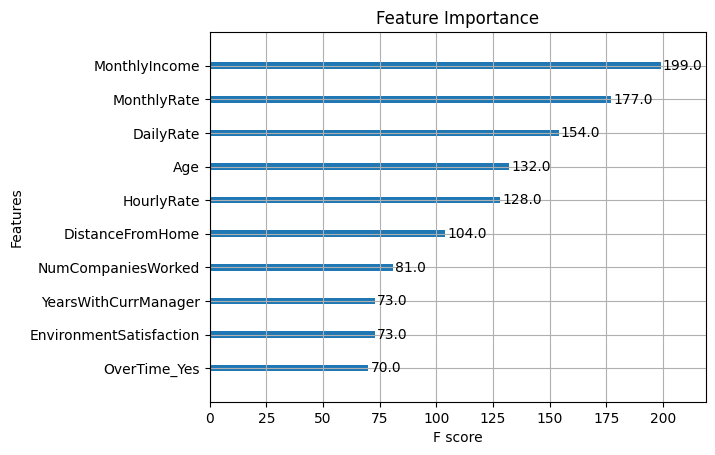

In [13]:
# Plot feature importance
xgb.plot_importance(best_model, importance_type='weight', max_num_features=10)
plt.title('Feature Importance')
plt.show()

#### Feature Importance Plot

This plot displays the importance of various features in predicting employee churn using a pre-trained XGBoost model. The features are ranked based on their F-score, which indicates how frequently a feature is used to split the data across all trees in the model. 

- **MonthlyIncome** is the most important feature with an F-score of 172, suggesting it is highly influential in predicting employee churn.
- Other significant features include **MonthlyRate**, **DistanceFromHome**, **Age**, and **DailyRate**.
- **EnvironmentSatisfaction**, **YearsWithCurrManager**, **NumCompaniesWorked**, and **RelationshipSatisfaction** are also shown to contribute to the model, though to a lesser extent.

This visualization helps to understand which features are most impactful in the model and can guide further analysis and decision-making.

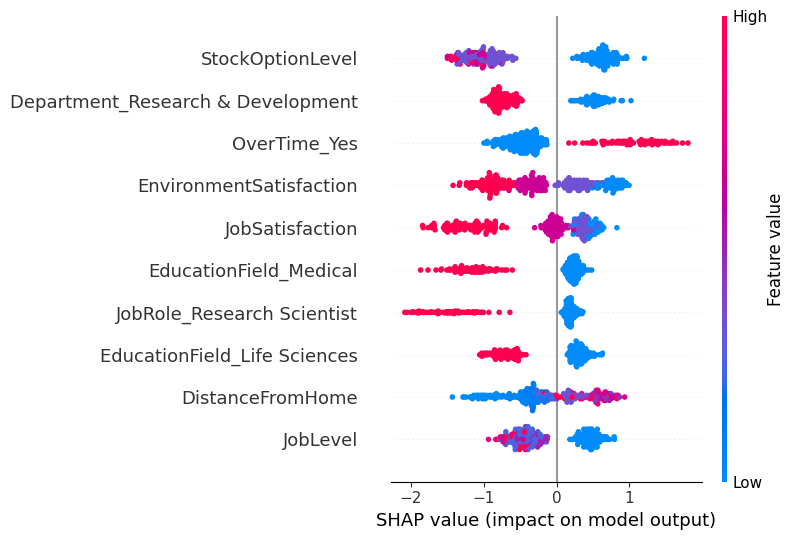

In [14]:
# Compute SHAP values
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Get the top 10 features
top_10_features = X_test.columns[np.argsort(np.abs(shap_values).mean(0))[-10:]]

# Filter the SHAP values and the test data for the top 10 features
shap_values_top_10 = shap_values[:, np.argsort(np.abs(shap_values).mean(0))[-10:]]
X_test_top_10 = X_test[top_10_features]

# Create SHAP summary plot for the top 10 features
shap.summary_plot(shap_values_top_10, X_test_top_10, plot_type="dot", color=plt.get_cmap("coolwarm"))
plt.show()



### SHAP Summary Plot

This SHAP summary plot illustrates the impact of various features on the model's output for predicting employee churn. Each dot represents a single employee's feature value and its corresponding SHAP value, which indicates the feature's influence on the prediction.

- **Color Scale**: The colors represent the feature values, with red indicating high values and blue indicating low values.
- **Horizontal Axis (SHAP value)**: The impact on the model output. A positive SHAP value pushes the prediction towards attrition, while a negative SHAP value pushes it towards no attrition.
- **Vertical Axis (Features)**: The top features contributing to the prediction, ranked by their importance.

For instance, employees with high **StockOptionLevel** (red) are less likely to leave (negative SHAP value), while employees in **Department_Research & Development** with lower satisfaction levels are more likely to leave (positive SHAP value).